In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [2]:
# Load the dataset
df = pd.read_csv('World-happiness-report-2024.csv')

# Display the first few rows
df.head()


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [4]:
!pip install wordcloud


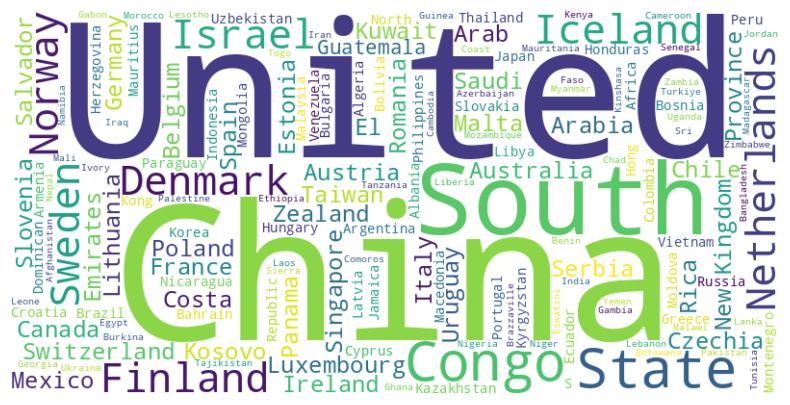

In [5]:
# Word Chart
from wordcloud import WordCloud

# Concatenate all country names
text = " ".join(country for country in df['Country name'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#A Word Chart isn't typically created from numerical data like this, but you can create a word cloud for the "Country name" or "Regional indicator":

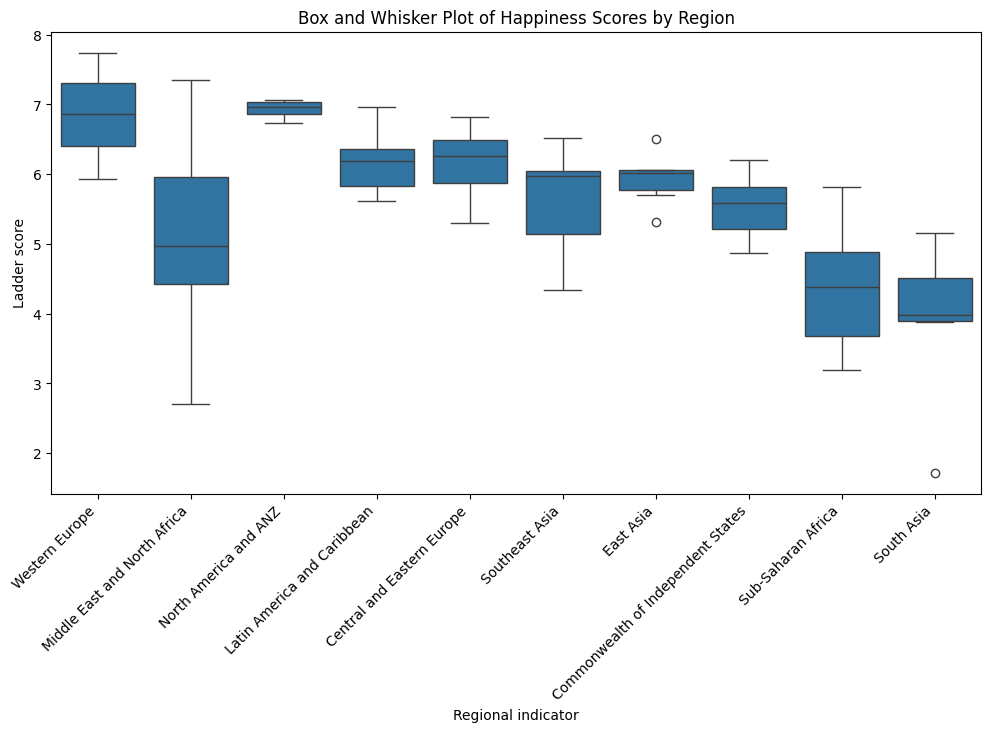

In [6]:
#Box and Whisker Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Regional indicator', y='Ladder score', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Box and Whisker Plot of Happiness Scores by Region')
plt.show()
#Visualize the distribution of the "Ladder score" by "Regional indicator":

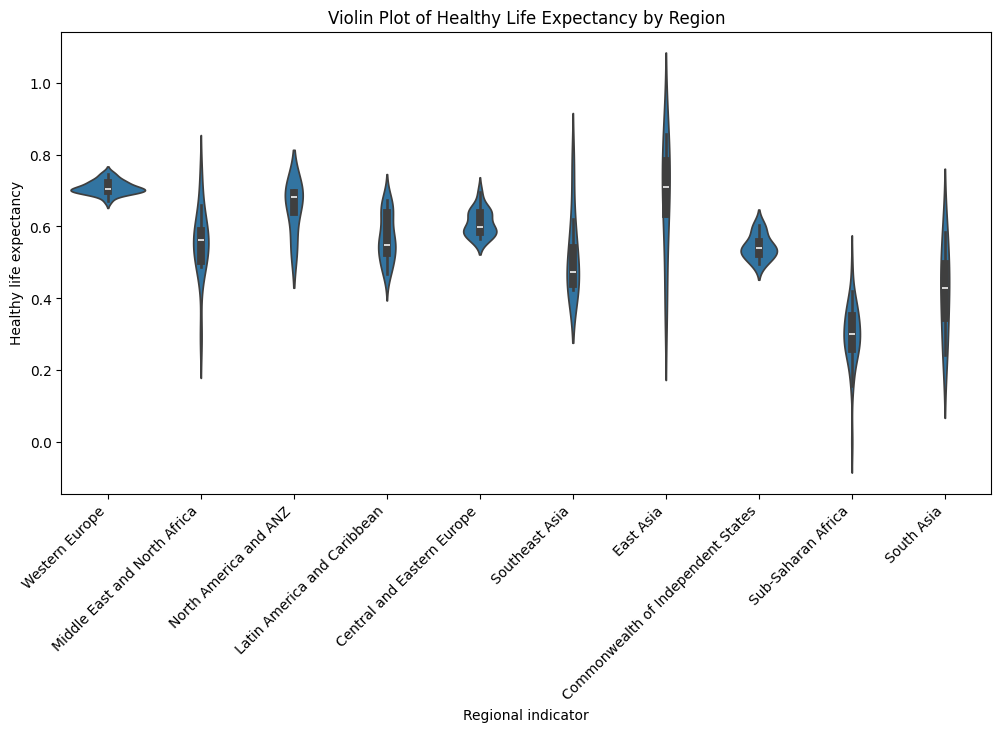

In [7]:
#Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Regional indicator', y='Healthy life expectancy', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Violin Plot of Healthy Life Expectancy by Region')
plt.show()

<Figure size 1000x600 with 0 Axes>

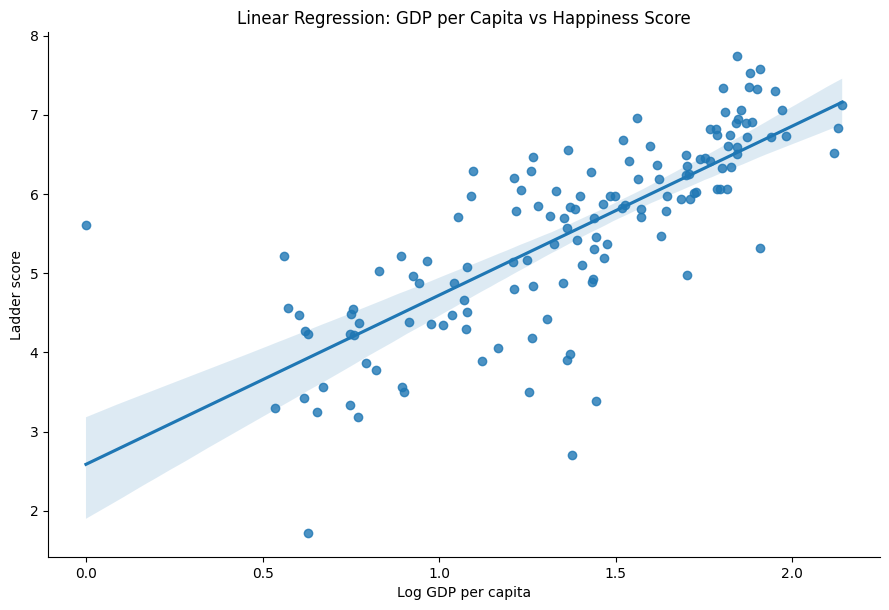

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:315: RuntimeWarning: divide by zero encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:318: RuntimeWarning: divide by zero encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Figure size 1000x600 with 0 Axes>

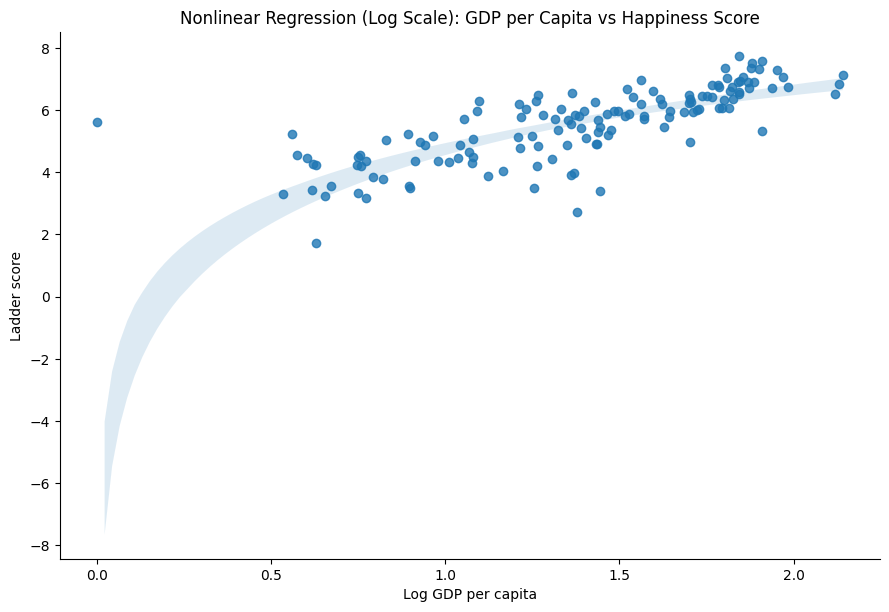

In [8]:
#Regression Plot (Linear and Nonlinear)
plt.figure(figsize=(10, 6))
sns.lmplot(x='Log GDP per capita', y='Ladder score', data=df, height=6, aspect=1.5)
plt.title('Linear Regression: GDP per Capita vs Happiness Score')
plt.show()

# Nonlinear regression (log scale)
plt.figure(figsize=(10, 6))
sns.lmplot(x='Log GDP per capita', y='Ladder score', data=df, height=6, aspect=1.5, logx=True)
plt.title('Nonlinear Regression (Log Scale): GDP per Capita vs Happiness Score')
plt.show()

#Examine the relationship between "Log GDP per capita" and "Ladder score":

In [21]:
#3D Chart
# Drop rows with NaN values in the 'Social support' column
df_cleaned = df.dropna(subset=['Social support'])

# Create the 3D scatter plot
fig = px.scatter_3d(df_cleaned, x='Log GDP per capita', y='Healthy life expectancy', z='Ladder score',
                    color='Regional indicator', size='Social support', hover_name='Country name')
fig.update_layout(title="3D Scatterplot: Happiness Score, GDP, and Life Expectancy")
fig.show()

#Visualize the relationship between "Ladder score", "Log GDP per capita", and "Healthy life expectancy": Western Europe has the highest Ladder score, Log GDP per capita and healthy life expectancy

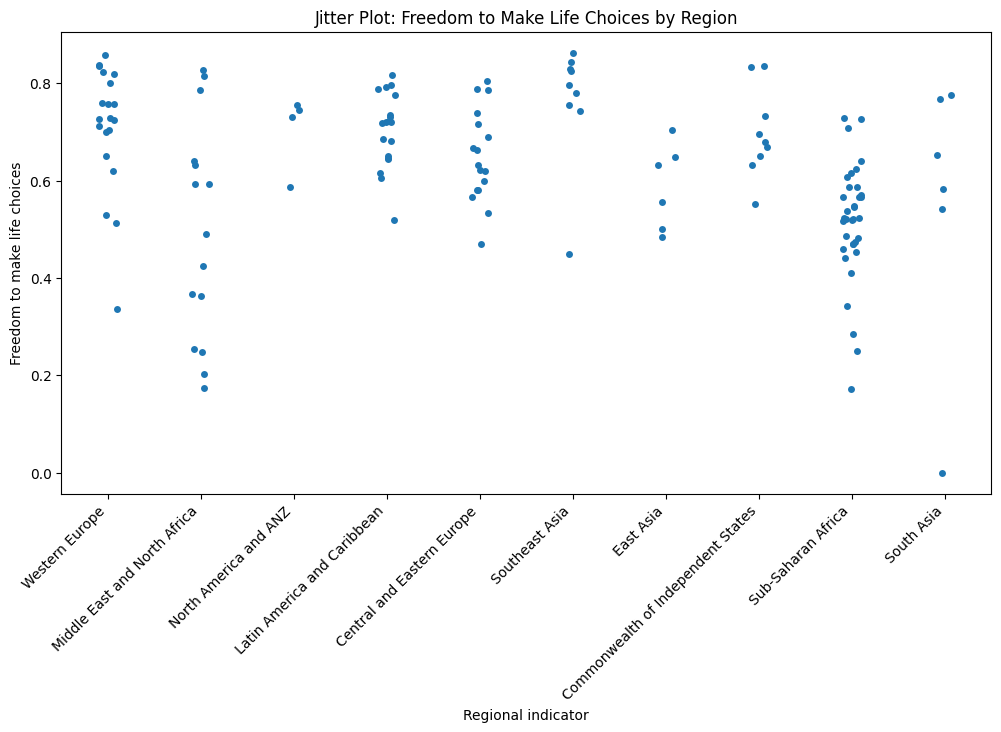

In [13]:
#Jitter Plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='Regional indicator', y='Freedom to make life choices', data=df, jitter=True)
plt.xticks(rotation=45, ha='right')
plt.title('Jitter Plot: Freedom to Make Life Choices by Region')
plt.show()
#Add jitter to the "Freedom to make life choices" across regions:Least freedom is in South Asia, middle East and North Africa

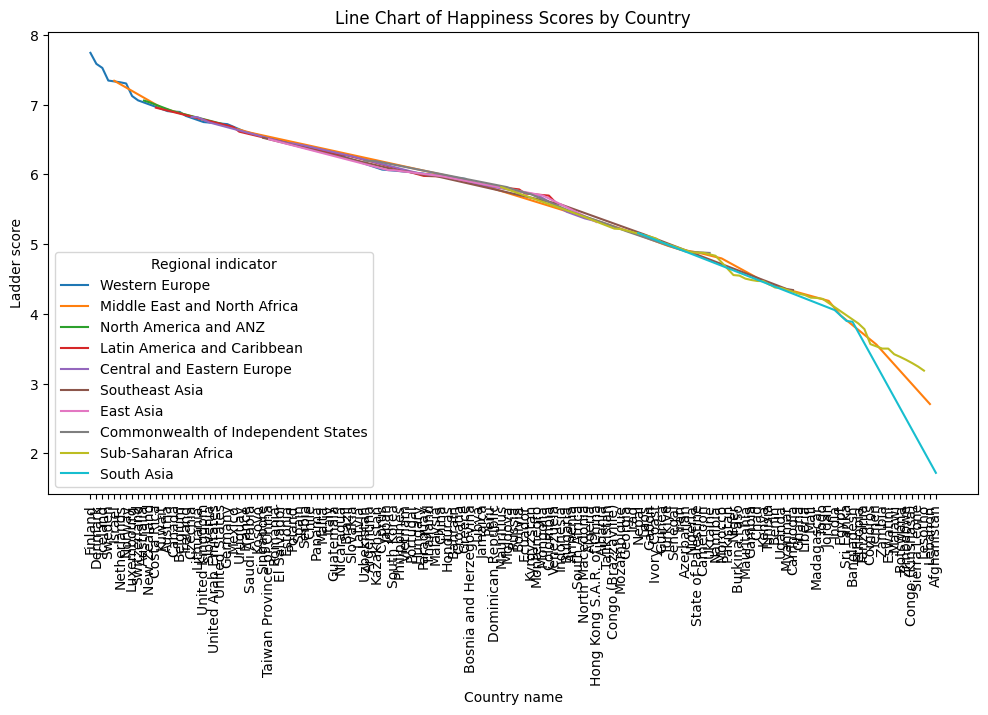

In [14]:
#Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Country name', y='Ladder score', hue='Regional indicator', data=df)
plt.xticks(rotation=90)
plt.title('Line Chart of Happiness Scores by Country')
plt.show()
#Analyze the "Ladder score" over time (if you have a time-series dataset, otherwise across countries):Western europe has highest indicator

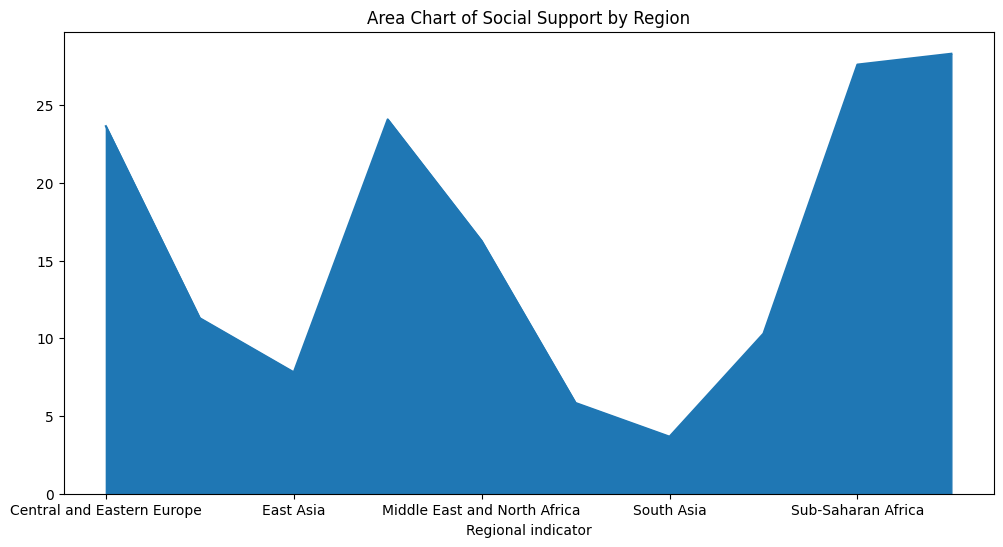

In [15]:
#Area Chart
df_grouped = df.groupby('Regional indicator').sum()
df_grouped['Social support'].plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Area Chart of Social Support by Region')
plt.show()

#Cumulative sum of "Social support" by region:Sub-Saharan Africa having highest Social support

In [22]:
#Waterfall Chart
import plotly.graph_objects as go

# Create the Waterfall chart with a fixed base value
fig = go.Figure(go.Waterfall(
    x=df['Country name'].head(10),  # Only showing first 10 for clarity
    y=df['Ladder score'].head(10),
    text=df['Country name'].head(10),
    measure=["relative" for _ in range(10)],
    base=0  # Set a fixed base value (e.g., 0)
))

fig.update_layout(title="Waterfall Chart of Happiness Scores",
                  xaxis_title="Country",
                  yaxis_title="Ladder Score")
fig.show()

#Waterfall charts in Python can be created using Plotly:Highest Happiness is in Australia

In [17]:
#Donut Chart
fig = px.pie(df, values='Generosity', names='Regional indicator', hole=0.4)
fig.update_layout(title="Donut Chart of Generosity by Region")
fig.show()
#Proportion of "Generosity" across regions:Hifhest generosity is among western europe and least among East Asia


In [18]:
#Treemap
fig = px.treemap(df, path=['Regional indicator', 'Country name'], values='Ladder score',
                 color='Ladder score', hover_data=['Log GDP per capita'],
                 color_continuous_scale='RdYlGn', title="Treemap of Happiness Scores by Country")
fig.show()

#Observation: Treemap of "Ladder score" by country: estern Europe having higheest ladder socre and Sub-Saharan Africa having least ladder score

In [20]:
#Funnel Chart
fig = go.Figure(go.Funnel(
    y = df['Regional indicator'].head(10),
    x = df['Log GDP per capita'].head(10),
    text = df['Country name'].head(10)
))

fig.update_layout(title="Funnel Chart of GDP per Capita by Region")
fig.show()

#Observation:Funnel chart using GDP with highest countries in western europe and Luxembourg having highest GDP per capita
